In [12]:
# import package 
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
from scipy.special import lqmn as qmn
from __future__ import division
import scipy.special as sc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)
from sympy import var, plot_implicit
import math
from math import radians as radian

# customize the plot 
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


# introduce constants that I use
G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value
plt.close()

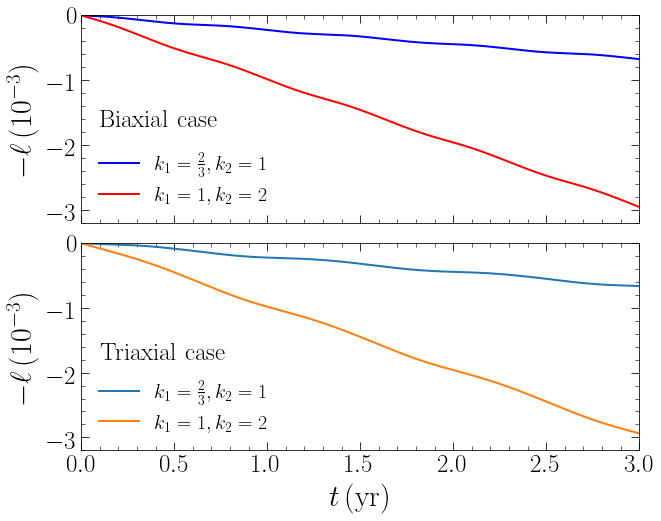

In [87]:
data=np.genfromtxt('spindown.dat')
t=data[:,0]

b1=data[:,1]
b2=data[:,2]
t1=data[:,3]
t2=data[:,4]

fig, (ax1,ax2)=plt.subplots(2,1, figsize=(10,8),sharex=True)
plt.subplots_adjust(hspace=0.1)

ax1.plot(t/yr,-b1/1e-3,color='blue',linewidth=2,label=r'$k_{1}=\frac{2}{3},k_{2}=1$')
ax1.plot(t/yr,-b2/1e-3,color='red',linewidth=2,label=r'$k_{1}=1,k_{2}=2$')

ax2.plot(t/yr,-t1/1e-3,linewidth=2,label=r'$k_{1}=\frac{2}{3},k_{2}=1$')
ax2.plot(t/yr,-t2/1e-3,linewidth=2,label=r'$k_{1}=1,k_{2}=2$')


plt.xlim(0,max(t)/yr)
ax1.set_ylim(-3.2,0)
ax2.set_ylim(-3.2,0)
# ax1.set_yticks([-0.003,-0.002,-0.001,0])
ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_ylabel(r'$-\ell\,(10^{-3})$', fontsize=30)
ax2.set_ylabel(r'$-\ell\,(10^{-3})$', fontsize=30)
plt.xlabel(r'$t\,(\rm yr)$',fontsize=30)
ax1.legend(frameon=False,fontsize=20)
ax2.legend(frameon=False,fontsize=20)
plt.text(0.1,1.8,r'$\rm Biaxial\ case$',fontsize=25)
plt.text(0.1,-1.8,r'$\rm Triaxial\ case$',fontsize=25)
plt.savefig("../../paper/fig_spindown.pdf", format='pdf', bbox_inches="tight")

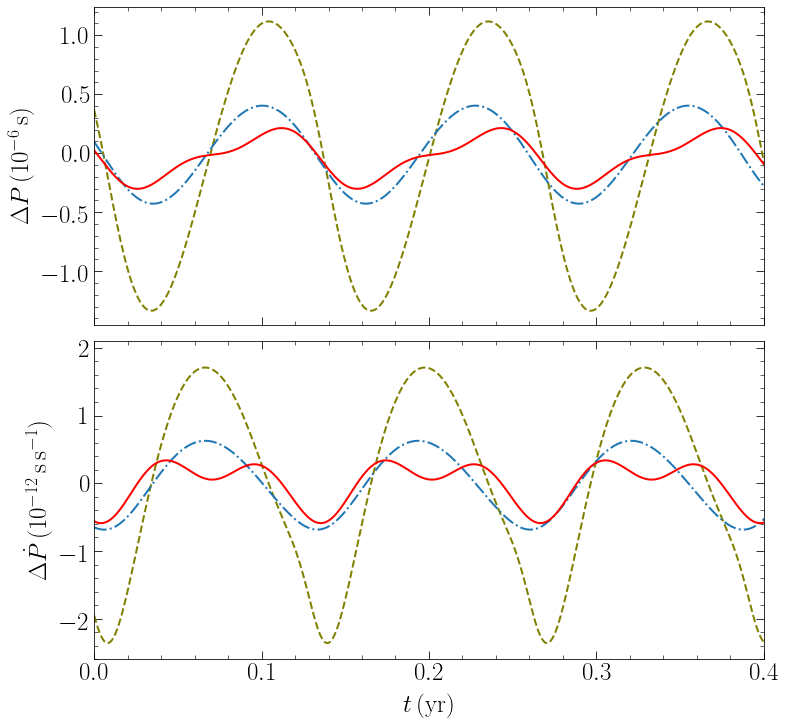

In [8]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(12,12),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['olive','tab:blue','red']
lines=['dashed','dashdot','solid']

names=['timing1','timing2','timing3']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2)
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2)
    
ax1.minorticks_on()
    
ax2.minorticks_on()
plt.xlim(0,0.4)
plt.xticks([0,0.1,0.2,0.3,0.4])
ax2.set_ylim(-2.6,2.1)
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../paper/fig_timing_biaxial.pdf", format='pdf', bbox_inches="tight")

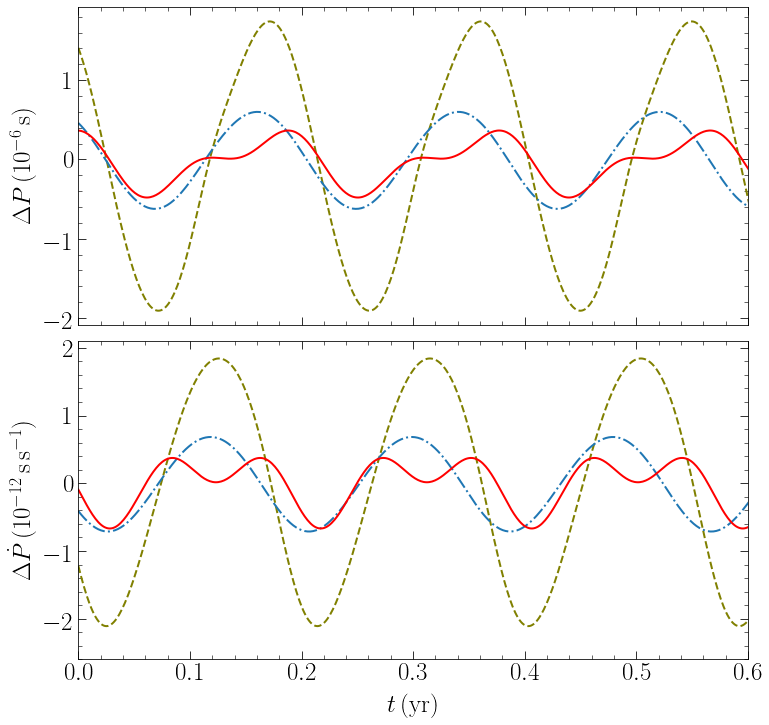

In [9]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(12,12),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['olive','tab:blue','red']
lines=['dashed','dashdot','solid']

names=['triaxial_timing1','triaxial_timing3','triaxial_timing2']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2)
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2)
    
ax1.minorticks_on()
    
ax2.minorticks_on()
plt.xlim(0,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax2.set_ylim(-2.6,2.1)
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../paper/fig_timing_triaxial.pdf", format='pdf', bbox_inches="tight")

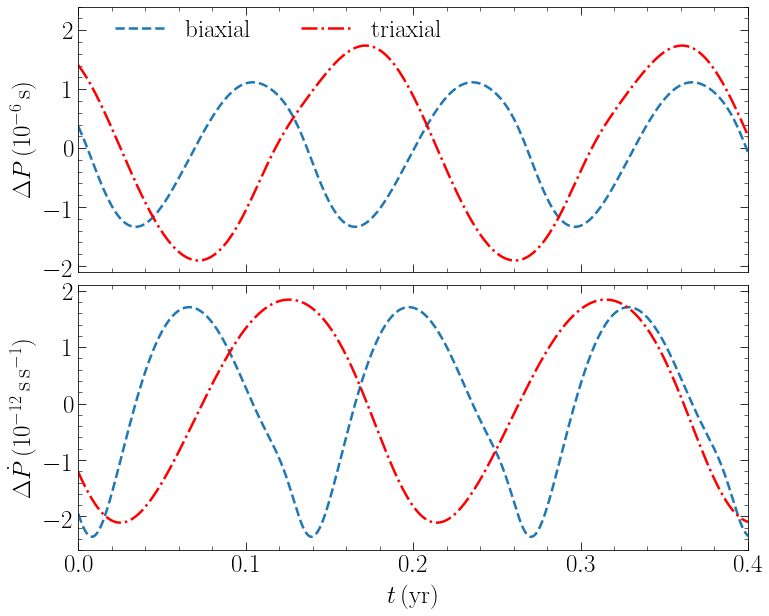

In [41]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(12,10),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['dashed','dashdot','solid']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing1','triaxial_timing1']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax1.set_ylim(-2.1,2.4)  
ax1.legend(fontsize=25,frameon=False,ncol=2,loc=(0.04,0.83))
ax2.minorticks_on()
plt.xlim(0,0.4)
plt.xticks([0,0.1,0.2,0.3,0.4])
ax2.set_ylim(-2.6,2.1)
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)

plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../paper/fig_timing1.pdf", format='pdf', bbox_inches="tight")

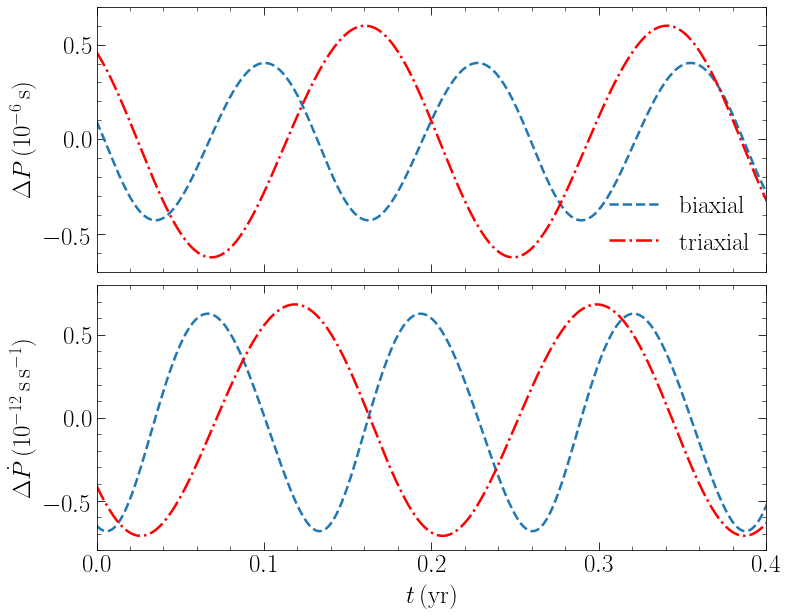

In [49]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(12,10),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['dashed','dashdot','solid']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing2','triaxial_timing3']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax1.set_ylim(-0.7,0.7)
ax2.minorticks_on()
plt.xlim(0,0.4)
plt.xticks([0,0.1,0.2,0.3,0.4])
ax2.set_ylim(-0.8,0.8)
ax1.legend(fontsize=25,frameon=False,loc=(0.75,0.03))
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../paper/fig_timing2.pdf", format='pdf', bbox_inches="tight")

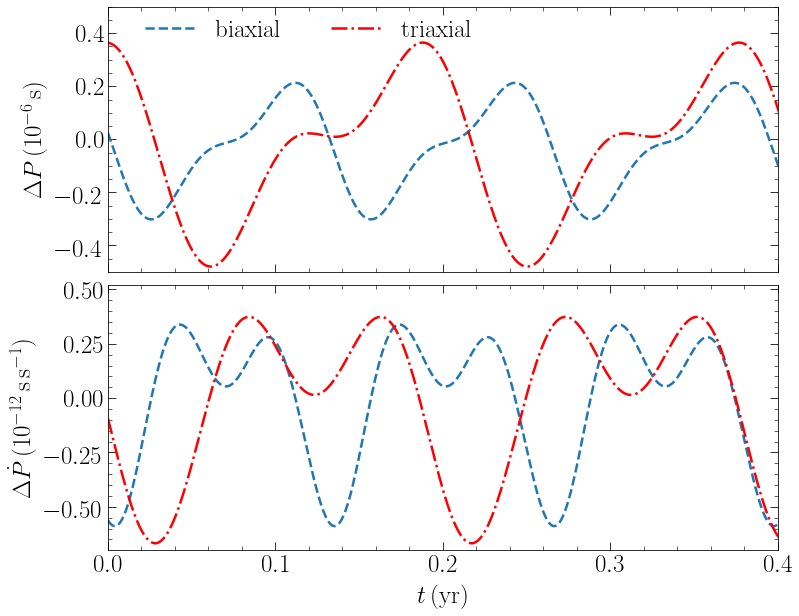

In [52]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(12,10),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['dashed','dashdot','solid']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing3','triaxial_timing2']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax1.set_ylim(-0.5,0.5) 
ax1.legend(fontsize=25,frameon=False,ncol=2,loc=(0.04,0.83))
ax2.minorticks_on()
plt.xlim(0,0.4)
plt.xticks([0,0.1,0.2,0.3,0.4])
ax2.set_ylim(-0.7,0.52)
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../paper/fig_timing3.pdf", format='pdf', bbox_inches="tight")

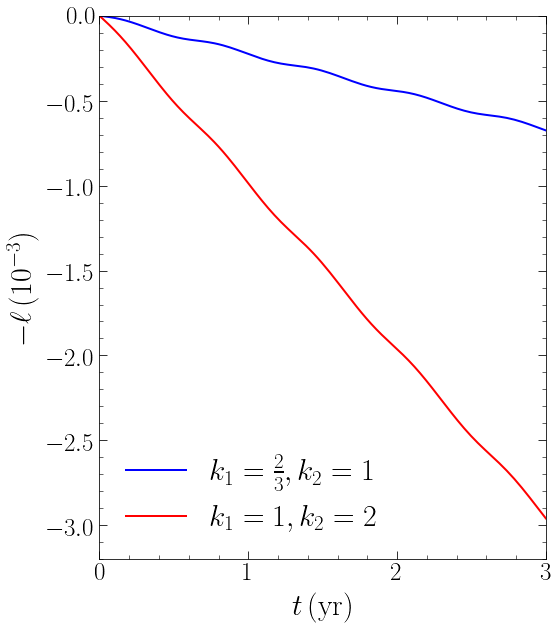

In [11]:
data=np.genfromtxt('spindown.dat')
t=data[:,0]

b1=data[:,1]
b2=data[:,2]
t1=data[:,3]
t2=data[:,4]

fig, ax1=plt.subplots(1,1, figsize=(8,10),sharex=True)


ax1.plot(t/yr,-b1/1e-3,color='blue',linewidth=2,label=r'$k_{1}=\frac{2}{3},k_{2}=1$')
ax1.plot(t/yr,-b2/1e-3,color='red',linewidth=2,label=r'$k_{1}=1,k_{2}=2$')



plt.xlim(0,max(t)/yr)
ax1.set_ylim(-3.2,0)

# ax1.set_yticks([-0.003,-0.002,-0.001,0])
ax1.minorticks_on()


ax1.set_ylabel(r'$-\ell\,(10^{-3})$', fontsize=30)

plt.xlabel(r'$t\,(\rm yr)$',fontsize=30)
ax1.legend(frameon=False,fontsize=30)

# plt.text(0.1,1.8,r'$\rm Biaxial\ case$',fontsize=25)
# plt.text(0.1,-1.8,r'$\rm Triaxial\ case$',fontsize=25)
plt.savefig("../../fig_spindown.pdf", format='pdf', bbox_inches="tight")

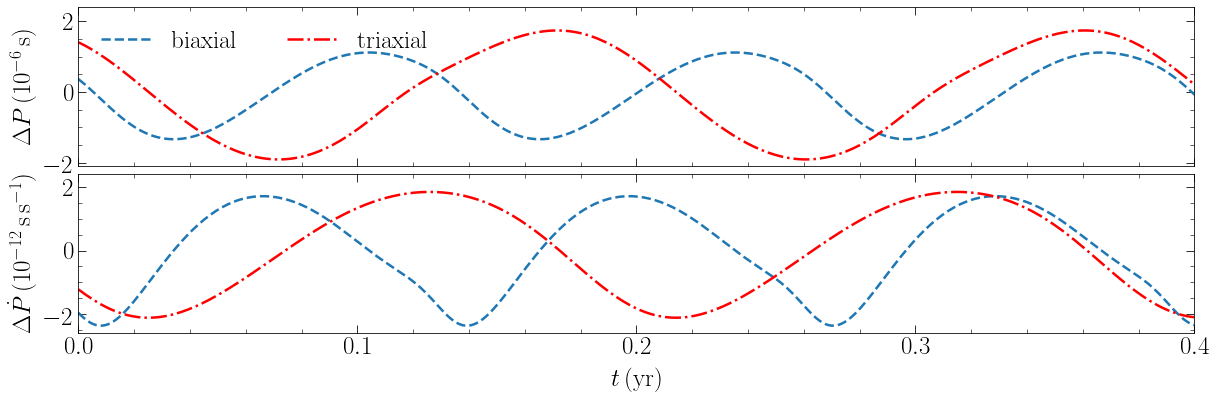

In [25]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(20,6),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['dashed','dashdot','solid']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing1','triaxial_timing1']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax1.set_ylim(-2.1,2.4)  
ax1.legend(fontsize=25,frameon=False,ncol=2)
ax2.minorticks_on()
plt.xlim(0,0.4)
plt.xticks([0,0.1,0.2,0.3,0.4])
ax2.set_ylim(-2.6,2.4)
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)

plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../fig_timing1.pdf", format='pdf', bbox_inches="tight")

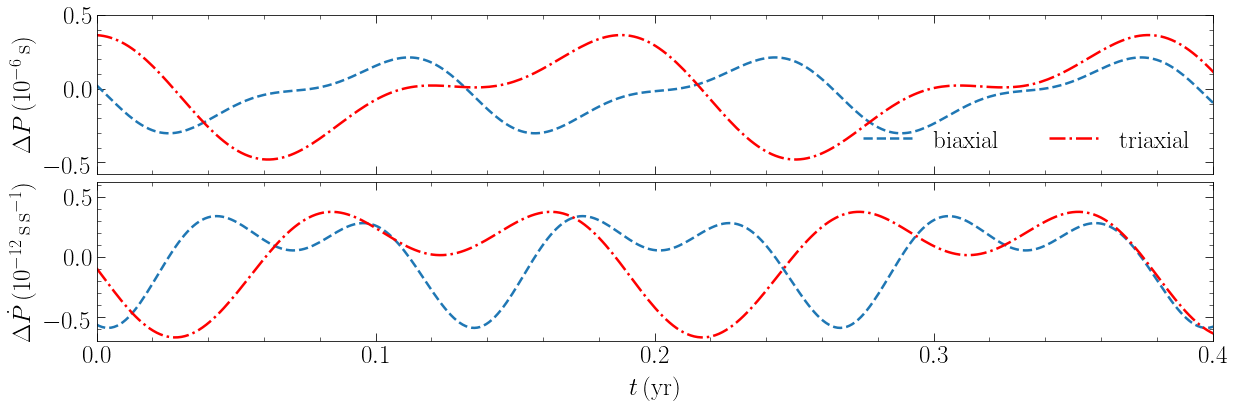

In [28]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(20,6),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['dashed','dashdot','solid']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing3','triaxial_timing2']

for i in range(len(names)):
    data1=np.genfromtxt(names[i]+'.dat')
    t=data1[:,0]/yr
    dp=data1[:,1]/1e-6
    dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax1.set_ylim(-0.58,0.5) 
ax1.legend(fontsize=25,frameon=False,ncol=2)
ax2.minorticks_on()
plt.xlim(0,0.4)
plt.xticks([0,0.1,0.2,0.3,0.4])
ax2.set_ylim(-0.7,0.62)
ax1.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta \dot{P}\,(10^{-12}\,\rm s\,s^{-1})$',fontsize=25)
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../../fig_timing3.pdf", format='pdf', bbox_inches="tight")